# load data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
table = np.load('/home/yunzheng/mock/color/data/newcatalogue/snap_92_new_with_zform.npy')

In [4]:
subid = table[:,0]
vpeak = table[:,1]
zform = table[:,11]

## 按照速度由小到大重新排列

In [5]:
stag = np.argsort(vpeak)
subid = subid[stag]
vpeak = vpeak[stag]
zform = zform[stag]

In [754]:
len(vpeak)

26241654

In [14]:
subid[24853104]

4148.0

In [373]:
vpeak[-1]

1835.6221923828125

In [13]:
np.where(zform ==12.406872085246118)

(array([24853104]),)

# 分bin统计

In [177]:
######对整体
bin_0 = np.arange(30,1841,10)
inds = np.digitize(vpeak,bin_0)

In [178]:
print(len(bin_0))

182


In [243]:
bin_0[70]

730

## 分bin存id，vpeak，zform

In [179]:
# 尝试把subhalo信息都存成一行方便查找
vpeak_bin = [[]for _ in range(182)]
for n in range(len(vpeak)):
    sub_info = np.array((int(subid[n]),vpeak[n],zform[n]))
    vpeak_bin[inds[n]].append(sub_info)

In [180]:
a = np.array(vpeak_bin[20])
a[:,1]

array([220.0002594 , 220.00030518, 220.00032043, ..., 229.99919128,
       229.99923706, 229.99951172])

In [259]:
len(vpeak_bin[70])

311

In [260]:
temp= (vpeak>800)*(vpeak<=840)

In [269]:
vpeak[temp]

array([800.02410889, 800.04736328, 800.0602417 , 800.11102295,
       800.12255859, 800.16906738, 800.2612915 , 800.27661133,
       800.36535645, 800.38378906, 800.4598999 , 800.47894287,
       800.52941895, 800.53625488, 800.59332275, 800.61730957,
       800.80541992, 800.89318848, 801.15496826, 801.18585205,
       801.19158936, 801.20428467, 801.29333496, 801.38171387,
       801.39794922, 801.54937744, 801.61364746, 801.61883545,
       801.6963501 , 801.73474121, 801.83331299, 801.85723877,
       801.86480713, 801.92749023, 801.95794678, 801.97851562,
       802.08105469, 802.12469482, 802.14923096, 802.15710449,
       802.23583984, 802.25665283, 802.34173584, 802.34490967,
       802.42895508, 802.50134277, 802.57330322, 802.62609863,
       802.76898193, 802.81176758, 802.83184814, 802.8604126 ,
       802.88476562, 802.99200439, 803.09338379, 803.1217041 ,
       803.12988281, 803.16394043, 803.1741333 , 803.2197876 ,
       803.34100342, 803.41473389, 803.47839355, 803.54

# 对红移分bin计算 zform cdf

## 对红移分bin

In [23]:
print(max(zform))

12.406872085246118


In [478]:
arr_red = np.arange(51)
bin_red = 0 + 12.5 * arr_red / 50

In [745]:
bin_red[40]

10.0

In [480]:
bin_red.shape

(51,)

## 用np.histgram计算cdf

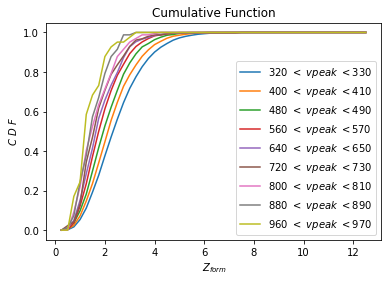

In [266]:
for i in range(30,100,8):

    info = np.array(vpeak_bin[i])
    v_hist = np.histogram(info[:,2],bin_red)[0]
    cdf = np.cumsum(v_hist/sum(v_hist))
    plt.plot(bin_red[1:],cdf,label = '$%s\ <\ vpeak\ < %s$'%(bin_0[i-1],bin_0[i]))
plt.legend()
plt.title('Cumulative Function')
plt.xlabel(r' $Z_{form}$ ')
plt.ylabel(r'$C\ D \ F$')
plt.savefig('/home/yunzheng/mock/color/picture/cumulative_function_test.pdf',dpi = 100)

# 分bin统计(log space)

In [346]:
######对整体
bin_log = np.logspace(1.478,3.264,num = 40)

### 测试上下限

In [347]:
np.log10(1840)

3.2648178230095364

In [348]:
10**3.264

1836.5383433483455

In [349]:
np.log10(30)

1.4771212547196624

In [350]:
10**1.478

30.060763026282306

In [520]:
bin_log[14]

131.56131481070796

In [510]:
bin_log

array([  30.06076303,   33.40372286,   37.1184424 ,   41.24626383,
         45.83312688,   50.93008007,   56.59384888,   62.88746702,
         69.88097799,   77.65221461,   86.28766522,   95.88343624,
        106.54632179,  118.39499222,  131.56131481,  146.19182137,
        162.44933906,  180.51480249,  200.58926744,  222.89614844,
        247.68370523,  275.22780572,  305.83499617,  339.84591287,
        377.63907316,  419.63508808,  466.30134342,  518.15720147,
        575.77978109,  639.81038066,  710.96161525,  790.02534758,
        877.88150081,  975.50785153, 1083.99091165, 1204.53802059,
       1338.49078202, 1487.33999504, 1652.74224563, 1836.53834335])

## 分bin存vpeak、zform

In [353]:
inds_log = np.digitize(vpeak,bin_log)

In [354]:
vpeak_logbin = [[]for _ in range(40)]
for n in range(len(vpeak)):
    sub_info = np.array((int(subid[n]),vpeak[n],zform[n]))
    vpeak_logbin[inds_log[n]].append(sub_info)

In [355]:
max(inds_log)

39

In [490]:
bin_log[14]

131.56131481070796

In [521]:
vpeak_logbin[14][:5]

[array([4.33328990e+07, 1.18394997e+02, 2.32836545e+00]),
 array([1.47965420e+07, 1.18394997e+02, 3.66281661e+00]),
 array([1.69562300e+07, 1.18395004e+02, 4.91692408e+00]),
 array([1.62060330e+07, 1.18395020e+02, 4.88956178e+00]),
 array([1.68844860e+07, 1.18395042e+02, 4.71029025e+00])]

### 用内部函数分bin尝试如下

In [362]:
vpeak_logbin_test = [[]for _ in range(40)]

for n in range(len(bin_log)):
#     sub_info = np.array((int(subid[n]),vpeak[n],zform[n]))
    temp= (vpeak>=bin_log[n])*(vpeak<bin_log[n+1])
    print(temp)
    a = np.stack((subid[temp],vpeak[temp],zform[temp]),axis=1)
    print(a.shape)

    vpeak_logbin_test[n].append(a)

[ True  True  True ... False False False]
(9, 3)
[False False False ... False False False]
(100, 3)
[False False False ... False False False]
(794, 3)
[False False False ... False False False]
(8315, 3)
[False False False ... False False False]
(46640, 3)
[False False False ... False False False]
(261756, 3)
[False False False ... False False False]
(975277, 3)
[False False False ... False False False]
(2458179, 3)
[False False False ... False False False]
(4262926, 3)
[False False False ... False False False]
(4770592, 3)
[False False False ... False False False]
(4106337, 3)
[False False False ... False False False]
(2957607, 3)
[False False False ... False False False]
(1963332, 3)
[False False False ... False False False]
(1327347, 3)
[False False False ... False False False]
(924729, 3)
[False False False ... False False False]
(648642, 3)
[False False False ... False False False]
(457500, 3)
[False False False ... False False False]
(322589, 3)
[False False False ... False False 

IndexError: index 40 is out of bounds for axis 0 with size 40

In [374]:
vpeak_logbin_test[0]

[array([[1.23607216e+08, 3.14089699e+01, 2.53440511e-01],
        [1.23104252e+08, 3.22051086e+01, 2.89062937e-01],
        [1.19959075e+08, 3.22896271e+01, 4.43556025e-01],
        [1.23443625e+08, 3.23239708e+01, 2.53440511e-01],
        [1.23153522e+08, 3.25514641e+01, 2.89062937e-01],
        [1.23592840e+08, 3.28375664e+01, 2.53440511e-01],
        [1.23785868e+08, 3.31623535e+01, 2.53440511e-01],
        [1.23464336e+08, 3.33657494e+01, 2.53440511e-01],
        [1.20105230e+08, 3.33743668e+01, 4.43556025e-01]])]

## red_bin 统计

15
16
17


Text(0, 0.5, '$C\\ D \\ F$')

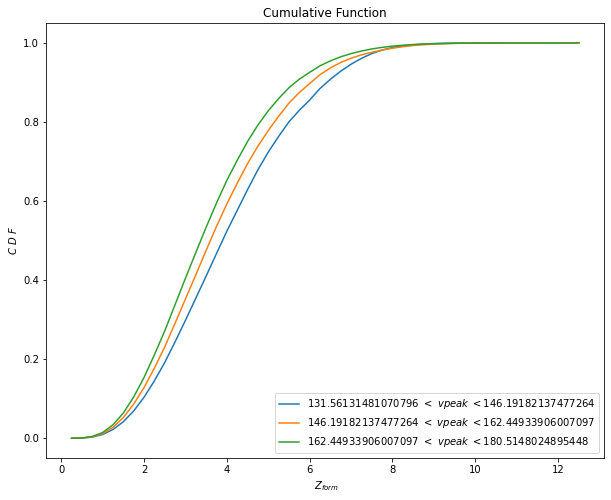

In [428]:
plt.figure(figsize=(10,8))
for i in range(15,18):
    print(i)
    info = np.array(vpeak_logbin[i])
    v_hist = np.histogram(info[:,2],bin_red)[0]
    cdf = np.cumsum(v_hist/sum(v_hist))
    plt.plot(bin_red[1:],cdf,label = '$%s\ <\ vpeak\ < %s$'%(bin_log[i-1],bin_log[i]))
plt.legend()
plt.title('Cumulative Function')
plt.xlabel(r' $Z_{form}$ ')
plt.ylabel(r'$C\ D \ F$')
# plt.savefig('/home/yunzheng/mock/color/picture/cumulative_function_test.pdf',dpi = 100)

### 通过画图比较得出从第35个bin开始出现问题

#### 把35、36合并 把37、38、39合并 

In [592]:
np.array(vpeak_logbin[-1])

array([[7.72800000e+03, 1.68668042e+03, 9.53621939e-01],
       [3.30540000e+04, 1.69480127e+03, 2.18064083e+00],
       [1.28834000e+05, 1.83562219e+03, 8.63603291e-01]])

In [445]:
a = np.array(vpeak_logbin[-1])
b = np.array(vpeak_logbin[-2])
c = np.array(vpeak_logbin[-3])


In [469]:
temp1 = np.concatenate((c,b,a),axis=0)


In [449]:
# temp1

In [451]:
d = np.array(vpeak_logbin[-4])
f = np.array(vpeak_logbin[-5])

In [499]:
vpeak_logbin[14][:5]

[array([4.33328990e+07, 1.18394997e+02, 2.32836545e+00]),
 array([1.47965420e+07, 1.18394997e+02, 3.66281661e+00]),
 array([1.69562300e+07, 1.18395004e+02, 4.91692408e+00]),
 array([1.62060330e+07, 1.18395020e+02, 4.88956178e+00]),
 array([1.68844860e+07, 1.18395042e+02, 4.71029025e+00])]

In [460]:
f[:5]

array([[7.89761000e+05, 1.08496313e+03, 3.93897204e-01],
       [1.09711000e+05, 1.08498804e+03, 1.00151654e+00],
       [1.47705000e+05, 1.08561145e+03, 2.17974646e+00],
       [1.14548000e+05, 1.08572461e+03, 1.03508981e+00],
       [3.48157000e+05, 1.08635437e+03, 7.04756034e-01]])

In [470]:
temp2 = np.concatenate((f,d),axis=0)

In [457]:
# temp2[:,2]

array([0.3938972 , 1.00151654, 2.17974646, 1.03508981, 0.70475603,
       0.86471871, 2.39100643, 0.86057493, 0.99048993, 0.76798234,
       2.55212044, 1.31903162, 1.4577916 , 1.17777799, 0.92072244,
       0.50900068, 2.1534536 , 2.23988362, 0.79176155, 0.9682981 ,
       1.50598635, 1.51542159, 0.77002087, 0.97186446, 2.29148587,
       0.88943922, 1.08921454, 1.238574  , 1.60480298, 0.6328248 ,
       2.31068286, 0.80205033, 1.07267149, 0.80589956, 1.27045576,
       2.8326688 , 1.70433316, 2.14241308, 2.06407656, 1.2662238 ,
       1.1438714 , 2.00869864, 1.3954557 , 1.22164113, 0.46392403,
       0.55750923, 0.81848023, 1.47760118, 0.83077985, 0.72689996,
       1.43748812, 0.72559329, 2.02820695, 1.55392414, 2.15332388,
       1.7530671 , 1.17379855, 2.51557377, 1.00834315, 1.35439316,
       2.03598297, 0.71611188, 0.85746905, 1.39364   , 2.3928712 ,
       2.72716532, 1.40403015, 0.80831892, 1.8469128 , 0.48353439,
       1.80509287, 2.26120695, 0.72700795, 0.51629856, 2.24479

14
15


Text(0, 0.5, '$C\\ D \\ F$')

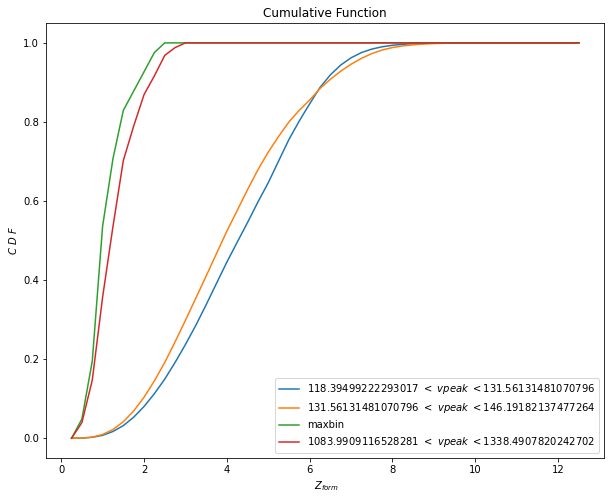

In [516]:
plt.figure(figsize=(10,8))
for i in range(14,16):
    print(i)
    info = np.array(vpeak_logbin[i])
    v_hist = np.histogram(info[:,2],bin_red)[0]
    cdf = np.cumsum(v_hist/sum(v_hist))
    plt.plot(bin_red[1:],cdf,label = '$%s\ <\ vpeak\ < %s$'%(bin_log[i-1],bin_log[i]))

v_hist1 = np.histogram(temp1[:,2],bin_red)[0]
cdf1 = np.cumsum(v_hist1/sum(v_hist1))
v_hist2 = np.histogram(temp2[:,2],bin_red)[0]
cdf2 = np.cumsum(v_hist2/sum(v_hist2))
plt.plot(bin_red[1:],cdf1,label = 'maxbin')
plt.plot(bin_red[1:],cdf2,label = '$%s\ <\ vpeak\ < %s$'%(bin_log[34],bin_log[36]))


plt.plot()
plt.legend()
plt.title('Cumulative Function')
plt.xlabel(r' $Z_{form}$ ')
plt.ylabel(r'$C\ D \ F$')

### 统计每个bin的cdf

#### 先统计满足规律的15-35 log bin

In [575]:
z_cdf = [[]for _ in range(52)]

for i in range(15,35):

    info = np.array(vpeak_logbin[i])
    vpeak_mean = np.mean(info[:,1])
    v_hist = np.histogram(info[:,2],bin_red)[0]
    cdf = np.cumsum(v_hist/sum(v_hist))
    
    for j in range(1,51):
        z_red = 0.5 * (bin_red[j-1]+bin_red[j])
        z_info = np.array((vpeak_mean,cdf[j-1],z_red))
        z_cdf[j].append(z_info)
            
            

#### 统计最后两个合并的bin

In [581]:
v_hist1 = np.histogram(temp1[:,2],bin_red)[0]
cdf1 = np.cumsum(v_hist1/sum(v_hist1))
vpeak_mean1 = np.mean(temp1[:,1])

v_hist2 = np.histogram(temp2[:,2],bin_red)[0]
cdf2 = np.cumsum(v_hist2/sum(v_hist2))
vpeak_mean2 = np.mean(temp2[:,1])

for j in range(1,51):
        z_red = 0.5 * (bin_red[j-1]+bin_red[j])
        z_info = np.array((vpeak_mean2,cdf2[j-1],z_red))
        z_cdf[j].append(z_info)
        
for j in range(1,51):
        z_red = 0.5 * (bin_red[j-1]+bin_red[j])
        z_info = np.array((vpeak_mean1,cdf1[j-1],z_red))
        z_cdf[j].append(z_info)


In [722]:
cdf2

array([0.        , 0.03968254, 0.1468254 , 0.35714286, 0.53571429,
       0.70238095, 0.78968254, 0.86904762, 0.91666667, 0.96825397,
       0.98809524, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [723]:
cdf1

array([0.        , 0.04878049, 0.19512195, 0.53658537, 0.70731707,
       0.82926829, 0.87804878, 0.92682927, 0.97560976, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

#### 想要添加第一组数据使得红移为0时所有subhalo cdf均为0

In [615]:
vpeaktemp = np.array(z_cdf[2])[:,0]

In [616]:
vpeaktemp

array([ 138.31725831,  153.70415069,  170.79746599,  189.78722813,
        210.8988981 ,  234.31149026,  260.38251905,  289.38892696,
        321.53184686,  357.14593608,  396.89947377,  441.16687723,
        490.12189185,  544.75286824,  605.02374879,  671.58179247,
        746.29048005,  829.78158606,  920.11091797, 1023.68474306,
       1170.94333758, 1467.45944288])

In [567]:
redtemp = np.zeros(22)

In [572]:
cdftemp = np.zeros(22)

In [596]:
subtemp = []
subtemp = np.stack((vpeaktemp,cdftemp,redtemp),axis=-1)

In [598]:
z_cdf[0] = subtemp

In [728]:
np.array(z_cdf[16])

array([[1.38317258e+02, 5.23679911e-01, 3.87500000e+00],
       [1.53704151e+02, 5.92712159e-01, 3.87500000e+00],
       [1.70797466e+02, 6.52271038e-01, 3.87500000e+00],
       [1.89787228e+02, 7.03343883e-01, 3.87500000e+00],
       [2.10898898e+02, 7.48529289e-01, 3.87500000e+00],
       [2.34311490e+02, 7.92666892e-01, 3.87500000e+00],
       [2.60382519e+02, 8.31334440e-01, 3.87500000e+00],
       [2.89388927e+02, 8.63849765e-01, 3.87500000e+00],
       [3.21531847e+02, 8.95716305e-01, 3.87500000e+00],
       [3.57145936e+02, 9.17635735e-01, 3.87500000e+00],
       [3.96899474e+02, 9.38922337e-01, 3.87500000e+00],
       [4.41166877e+02, 9.53948820e-01, 3.87500000e+00],
       [4.90121892e+02, 9.64208062e-01, 3.87500000e+00],
       [5.44752868e+02, 9.78140734e-01, 3.87500000e+00],
       [6.05023749e+02, 9.84911354e-01, 3.87500000e+00],
       [6.71581792e+02, 9.87507617e-01, 3.87500000e+00],
       [7.46290480e+02, 9.93984962e-01, 3.87500000e+00],
       [8.29781586e+02, 9.95689

#### 想要添加最后一组数据使得红移为12.5时所有subhalo cdf均为1

In [606]:
vpeaktemp = np.array(z_cdf[0])[:,0]

In [660]:
redtemp = np.ones(22) * 12.5

In [608]:
cdftemp = np.ones(22)

In [663]:
subtemp = []
subtemp = np.stack((vpeaktemp,cdftemp,redtemp),axis=-1)

In [664]:
z_cdf[51] = subtemp

In [742]:
z_cdf[49]

[array([138.31725831,   1.        ,  12.125     ]),
 array([153.70415069,   1.        ,  12.125     ]),
 array([170.79746599,   0.99999781,  12.125     ]),
 array([189.78722813,   1.        ,  12.125     ]),
 array([210.8988981,   1.       ,  12.125    ]),
 array([234.31149026,   1.        ,  12.125     ]),
 array([260.38251905,   1.        ,  12.125     ]),
 array([289.38892696,   1.        ,  12.125     ]),
 array([321.53184686,   1.        ,  12.125     ]),
 array([357.14593608,   1.        ,  12.125     ]),
 array([396.89947377,   1.        ,  12.125     ]),
 array([441.16687723,   1.        ,  12.125     ]),
 array([490.12189185,   1.        ,  12.125     ]),
 array([544.75286824,   1.        ,  12.125     ]),
 array([605.02374879,   1.        ,  12.125     ]),
 array([671.58179247,   1.        ,  12.125     ]),
 array([746.29048005,   1.        ,  12.125     ]),
 array([829.78158606,   1.        ,  12.125     ]),
 array([920.11091797,   1.        ,  12.125     ]),
 array([1.02368

In [666]:
np.save('/home/yunzheng/mock/color/data/zcdf/cdf.npy',z_cdf)

# 对每个红移bin做vpeak插值

## 用scipy.interpolate 做外插 得到每个subhalo速度

In [667]:
z_cdf_new = np.load('/home/yunzheng/mock/color/data/zcdf/cdf.npy')

In [668]:
z_cdf_new[51][0][2]

12.5

In [632]:
from scipy.interpolate import interp1d

In [729]:
cdf_inter = [[]for _ in range(52)]
temp_inter = [[]for _ in range(52)]
for i in range(52):
    v0 = z_cdf_new[i][:,0]
    cdf0 = z_cdf_new[i][:,1]
    red0 = z_cdf_new[i][:,2]
    f_in = interp1d(v0,cdf0, fill_value='extrapolate')
    temp_inter[i] = f_in(vpeak)
    
    temp_ex = temp_inter[i] > 1
    temp_inter[i][temp_ex] = 1
    
    temp_ex = temp_inter[i] < 0
    temp_inter[i][temp_ex] = 0
    cdf_inter[i] = temp_inter[i]

In [750]:
temparray = np.array(cdf_inter)

In [751]:
temparray[:,23139211]

array([0.00000000e+00, 2.16338665e-06, 4.11748971e-04, 2.60204704e-03,
       8.50046700e-03, 1.96692654e-02, 3.70805710e-02, 6.13089391e-02,
       9.27997171e-02, 1.31010567e-01, 1.74240679e-01, 2.23186755e-01,
       2.74550940e-01, 3.28166706e-01, 3.81785422e-01, 4.37039754e-01,
       4.93369875e-01, 5.45917094e-01, 6.00116316e-01, 6.52681966e-01,
       6.99873921e-01, 7.40985175e-01, 7.79310210e-01, 8.09832981e-01,
       8.36983633e-01, 8.69322130e-01, 8.95279132e-01, 9.18802224e-01,
       9.39430417e-01, 9.56947627e-01, 9.71531500e-01, 9.81964111e-01,
       9.88981175e-01, 9.93315785e-01, 9.95858051e-01, 9.97773893e-01,
       9.99004164e-01, 9.99548696e-01, 9.99795963e-01, 9.99899248e-01,
       9.99999132e-01, 1.00000000e+00, 9.99996238e-01, 1.00000000e+00,
       1.00000000e+00, 9.99998988e-01, 9.99999595e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [669]:
cdf_red = np.ones(52)
for i in range(52):
    cdf_red[i] = z_cdf_new[i][0][2] 

In [671]:
cdf_red

array([ 0.   ,  0.125,  0.375,  0.625,  0.875,  1.125,  1.375,  1.625,
        1.875,  2.125,  2.375,  2.625,  2.875,  3.125,  3.375,  3.625,
        3.875,  4.125,  4.375,  4.625,  4.875,  5.125,  5.375,  5.625,
        5.875,  6.125,  6.375,  6.625,  6.875,  7.125,  7.375,  7.625,
        7.875,  8.125,  8.375,  8.625,  8.875,  9.125,  9.375,  9.625,
        9.875, 10.125, 10.375, 10.625, 10.875, 11.125, 11.375, 11.625,
       11.875, 12.125, 12.375, 12.5  ])

In [757]:
np.save('/home/yunzheng/mock/color/data/zcdf/cdf_redbin.npy',cdf_red)

In [758]:
np.save('/home/yunzheng/mock/color/data/zcdf/cdf_inter.npy',cdf_inter)

## 画图检验

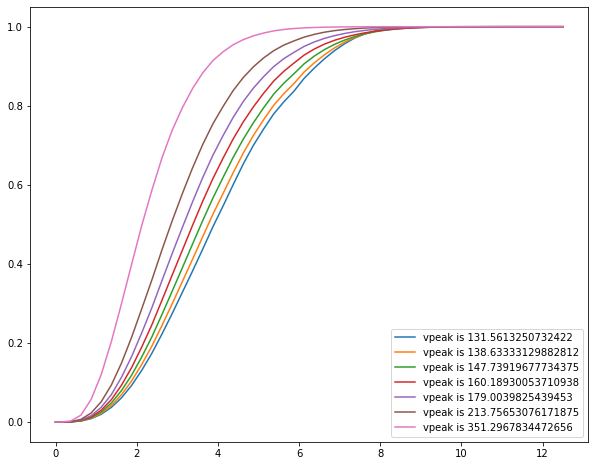

In [756]:
plt.figure(figsize=(10,8))
for i in range(23139211,26241654,500000):
    plt.plot(cdf_red,temparray[:,i],label = 'vpeak is %s'%vpeak[i])
plt.legend()